In [1]:
# ========================
# Samudra BGC – Pre-Training Checks
# ========================

# === EDIT THIS BASE PATH ===
BASE = "/scratch/gpfs/GEOCLIM/LRGROUP/maximek/INMOS/prototypes_dataset/processed_data"
DATA_ZARR = f"{BASE}/bgc_data.zarr"
MEAN_ZARR = f"{BASE}/bgc_means.zarr"
STD_ZARR  = f"{BASE}/bgc_stds.zarr"

print("Data store:", DATA_ZARR)
print("Mean store:", MEAN_ZARR)
print("Std  store:", STD_ZARR)


Data store: /scratch/gpfs/GEOCLIM/LRGROUP/maximek/INMOS/prototypes_dataset/processed_data/bgc_data.zarr
Mean store: /scratch/gpfs/GEOCLIM/LRGROUP/maximek/INMOS/prototypes_dataset/processed_data/bgc_means.zarr
Std  store: /scratch/gpfs/GEOCLIM/LRGROUP/maximek/INMOS/prototypes_dataset/processed_data/bgc_stds.zarr


In [2]:
import xarray as xr
ds_data = xr.open_zarr(DATA_ZARR, consolidated=True)
ds_data
ds_data.dims

Frozen({'time': 3285, 'y': 270, 'x': 180, 'lev': 44})

In [13]:
import xarray as xr, numpy as np
STD = "../../prototypes_dataset/processed_data/bgc_stds.zarr"
s = xr.open_zarr(STD, consolidated=True)
bad = [(v, float(s[v].values)) for v in s.data_vars if not np.isfinite(s[v]).item() or float(s[v].values)==0.0]
print("Zero/NaN stds:", bad[:20], "...", len(bad))


Zero/NaN stds: [('tauvo', 0.0)] ... 1


In [14]:
ds = xr.open_zarr("../../prototypes_dataset/processed_data/bgc_data.zarr/", consolidated=True)
m0 = ds["mask_0"].values
print("boundary sums:",
      m0[0,:].sum(), m0[-1,:].sum(), m0[:,0].sum(), m0[:,-1].sum())


boundary sums: 0.0 0.0 0.0 0.0


In [3]:
ds_samu = xr.open_zarr("../../Samudra/OM4_data/data.zarr/")
ds_samu.dims


Frozen({'y': 180, 'x': 360, 'lev': 19, 'time': 3504, 'y_b': 181, 'x_b': 361})

In [4]:
ds_samu

<xarray.Dataset>
Dimensions:            (y: 180, x: 360, lev: 19, time: 3504, y_b: 181, x_b: 361)
Coordinates:
    areacello          (y, x) float64 dask.array<chunksize=(90, 360), meta=np.ndarray>
    dz                 (lev) int64 dask.array<chunksize=(19,), meta=np.ndarray>
    lat                (y, x) float64 dask.array<chunksize=(90, 360), meta=np.ndarray>
    lat_b              (y_b, x_b) float64 dask.array<chunksize=(91, 361), meta=np.ndarray>
  * lev                (lev) float64 2.5 10.0 22.5 40.0 ... 4e+03 5e+03 6e+03
    lon                (y, x) float64 dask.array<chunksize=(90, 360), meta=np.ndarray>
    lon_b              (y_b, x_b) float64 dask.array<chunksize=(91, 361), meta=np.ndarray>
    ocean_fraction     (lev, y, x) float64 dask.array<chunksize=(19, 180, 360), meta=np.ndarray>
  * time               (time) object 1975-01-03 12:00:00 ... 2022-12-29 12:00:00
    wetmask            (lev, y, x) bool dask.array<chunksize=(10, 90, 360), meta=np.ndarray>
  * x                  (x) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * y                  (y) float64 -89.24 -88.25 -87.25 ... 87.25 88.25 89.24
Dimensions without coordinates: y_b, x_b
Data variables: (12/81)
    hfds               (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    hfds_anomalies     (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    so_lev_1050_0      (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    so_lev_105_0       (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    so_lev_10_0        (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    so_lev_1400_0      (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    ...                 ...
    vo_lev_5000_0      (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    vo_lev_550_0       (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    vo_lev_6000_0      (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    vo_lev_65_0        (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    vo_lev_775_0       (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    zos                (time, y, x) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes:
    m2lines/ocean-emulators_git_hash:  https://github.com/m2lines/ocean_emula...
    regrid_method:                     conservative

In [5]:
import os
import xarray as xr

# Check files exist
assert os.path.isdir(DATA_ZARR), f"Missing: {DATA_ZARR}"
assert os.path.isdir(MEAN_ZARR), f"Missing: {MEAN_ZARR}"
assert os.path.isdir(STD_ZARR),  f"Missing: {STD_ZARR}"

# Open dataset
ds = xr.open_zarr(DATA_ZARR)
print("Opened bgc_data.zarr")
print("Dims:", ds.dims)
print("First 15 variables:", list(ds.data_vars)[:15])
if "time" in ds.dims:
    print("Time length:", ds.sizes["time"])


Opened bgc_data.zarr
Dims: Frozen({'time': 3285, 'y': 270, 'x': 180, 'lev': 44})
First 15 variables: ['CT_0', 'CT_1', 'CT_10', 'CT_11', 'CT_12', 'CT_13', 'CT_14', 'CT_15', 'CT_16', 'CT_17', 'CT_18', 'CT_19', 'CT_2', 'CT_20', 'CT_21']
Time length: 3285


In [6]:
# Check mask ring (impermeable walls): edge cells of mask_0 should be 0s
import numpy as np

mask_name = "mask_0"
if mask_name in ds:
    m = ds[mask_name].values  # (yh, xh)
    south = int(np.min(m[0, :]))
    north = int(np.min(m[-1, :]))
    west  = int(np.min(m[:, 0]))
    east  = int(np.min(m[:, -1]))
    print(f"Edge mins (south,north,west,east) = ({south},{north},{west},{east})  -> expect 0,0,0,0")
else:
    print(f"WARNING: {mask_name} not found; masks may not have been written.")


Edge mins (south,north,west,east) = (0,0,0,0)  -> expect 0,0,0,0


In [7]:
# Open stats and check they are GLOBAL (0-D) per variable (Samudra-original style)
m = xr.open_zarr(MEAN_ZARR)
s = xr.open_zarr(STD_ZARR)
print("mean dims:", m.dims)
print("std  dims:", s.dims)

# List a few variables in means/stds
print("Means sample:", list(m.data_vars)[:12])
print("Stds  sample:", list(s.data_vars)[:12])


mean dims: Frozen({})
std  dims: Frozen({})
Means sample: ['CT_0', 'CT_1', 'CT_10', 'CT_11', 'CT_12', 'CT_13', 'CT_14', 'CT_15', 'CT_16', 'CT_17', 'CT_18', 'CT_19']
Stds  sample: ['CT_0', 'CT_1', 'CT_10', 'CT_11', 'CT_12', 'CT_13', 'CT_14', 'CT_15', 'CT_16', 'CT_17', 'CT_18', 'CT_19']


In [8]:
# Verify channel alignment: every data variable (excluding masks) should have entries in means/stds
data_vars = set(ds.data_vars)
mask_vars = {v for v in data_vars if v.startswith("mask_")} | {"wetmask"}
candidate_vars = data_vars - mask_vars  # variables that should be normalized

mean_vars = set(m.data_vars)
std_vars  = set(s.data_vars)

missing_in_mean = sorted([v for v in candidate_vars if v not in mean_vars])
missing_in_std  = sorted([v for v in candidate_vars if v not in std_vars])
extra_in_mean   = sorted([v for v in mean_vars if v not in candidate_vars])
extra_in_std    = sorted([v for v in std_vars  if v not in candidate_vars])

print("Missing in means:", missing_in_mean[:20], ("... (truncated)" if len(missing_in_mean)>20 else ""))
print("Missing in stds :", missing_in_std[:20],  ("... (truncated)" if len(missing_in_std)>20 else ""))
print("Extra in means  :", extra_in_mean[:20],   ("... (truncated)" if len(extra_in_mean)>20 else ""))
print("Extra in stds   :", extra_in_std[:20],    ("... (truncated)" if len(extra_in_std)>20 else ""))

if not missing_in_mean and not missing_in_std:
    print("✓ All candidate data variables have corresponding mean/std entries.")
else:
    print("! Mismatch detected. Consider re-running stats or adjusting var lists.")


Missing in means: [] 
Missing in stds : [] 
Extra in means  : [] 
Extra in stds   : [] 
✓ All candidate data variables have corresponding mean/std entries.


In [9]:
# Chunk sanity check: ensure last chunk size <= first chunk size (Zarr v2 constraint) for a few vars
def chunk_okay(chunks_tuple):
    if chunks_tuple is None:
        return True
    try:
        for axis in chunks_tuple:
            if len(axis) >= 2 and axis[-1] > axis[0]:
                return False
        return True
    except Exception:
        return True

to_check = [v for v in list(ds.data_vars) if not v.startswith("mask_")][:10]
for v in to_check:
    try:
        ch = ds[v].chunks
        status = "OK" if chunk_okay(ch) else "BAD"
        print(f"{v:20s} chunks={ch} -> {status}")
    except Exception as e:
        print(f"{v:20s} (no chunks attr or error) -> OK")


CT_0                 chunks=((62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61), (180, 90), (180,)) -> OK
CT_1                 chunks=((62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61), (180, 90), (180,)) -> OK
CT_10                chunks=((62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61), (180, 90), (180,)) -> OK
CT_11                chunks=((62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62

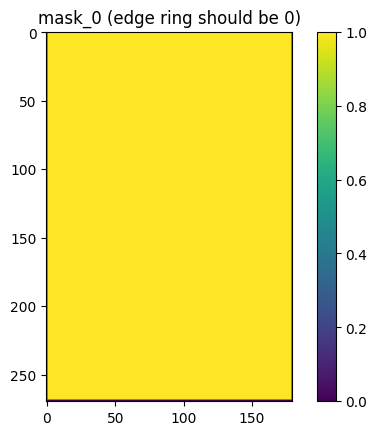

In [10]:
# Optional: visualize the mask ring
import matplotlib.pyplot as plt

if "mask_0" in ds:
    m0 = ds["mask_0"].values
    plt.imshow(m0)
    plt.title("mask_0 (edge ring should be 0)")
    plt.colorbar()
    plt.show()
else:
    print("No mask_0 to plot.")


In [11]:
import numpy, pandas, xarray, zarr, torch
print("numpy  :", numpy.__version__)
print("pandas :", pandas.__version__)
print("xarray :", xarray.__version__)
print("zarr   :", zarr.__version__)
print("torch  :", torch.__version__)
# Import a compiled pandas extension to prove ABI OK:
import pandas._libs.interval as _test
print("pandas._libs.interval import: OK")


numpy  : 1.24.4
pandas : 2.2.1
xarray : 2023.7.0
zarr   : 2.16.1
torch  : 2.2.1+cu121
pandas._libs.interval import: OK


In [12]:
import importlib, sys, textwrap, os

# ---- declare requirements (name_in_import, friendly_name, expected_version or None, channel_hint)
REQS = [
    ("numpy",            "numpy",            ">=1.26.0",     "conda-forge"),
    ("pandas",           "pandas",           ">=2.2.0",      "conda-forge"),
    ("xarray",           "xarray",           "==2023.7.0",   "conda-forge"),
    ("zarr",             "zarr",             "==2.16.1",     "conda-forge"),
    ("dask",             "dask",             ">=2024.2.1",   "conda-forge"),
    ("matplotlib",       "matplotlib",       ">=3.8.0",      "conda-forge"),
    ("cartopy",          "cartopy",          ">=0.23.0",     "conda-forge"),
    ("xarrayutils",      "xarrayutils",      ">=2.0.1",      "conda-forge"),
    ("dacite",           "dacite",           ">=1.9.1",      "conda-forge"),
    ("cmocean",          "cmocean",          ">=4.0.3",      "conda-forge"),
    ("sklearn",          "scikit-learn",     ">=1.4.1",      "conda-forge"),
    ("huggingface_hub",  "huggingface-hub",  ">=0.23.4",     "conda-forge"),
    ("ipykernel",        "ipykernel",        ">=6.29.0",     "conda-forge"),
    ("ipywidgets",       "ipywidgets",       ">=8.1.2",      "conda-forge"),
    ("requests",         "requests",         ">=2.32.0",     "conda-forge"),
    ("aiohttp",          "aiohttp",          ">=3.9.3",      "conda-forge"),
    ("cftime",           "cftime",           ">=1.5.2",      "conda-forge"),
    ("einops",           "einops",           ">=0.8.0",      "conda-forge"),
    ("nc_time_axis",     "nc-time-axis",     ">=1.4.1",      "conda-forge"),
    # netCDF/HDF backends (nice to have, used by some preprocess steps)
    ("netCDF4",          "netcdf4",          None,           "conda-forge"),
    ("h5py",             "h5py",             None,           "conda-forge"),
    ("h5netcdf",         "h5netcdf",         None,           "conda-forge"),
    # PyTorch (GPU)
    ("torch",            "pytorch",          "==2.2.1",      "pytorch/nvidia"),
    ("torchvision",      "torchvision",      None,           "pytorch/nvidia"),
    ("torchaudio",       "torchaudio",       None,           "pytorch/nvidia"),
]

def v_ok(installed, spec):
    if spec is None: 
        return True
    import packaging.version, packaging.specifiers
    try:
        return packaging.version.Version(installed) in packaging.specifiers.SpecifierSet(spec)
    except Exception:
        return True  # if we can't parse, don't block

missing = []
badvers = []

print("== Package audit ==")
for modname, nice, spec, ch in REQS:
    try:
        m = importlib.import_module(modname)
        ver = getattr(m, "__version__", None)
        if ver is None and modname == "sklearn":
            import sklearn; ver = sklearn.__version__
        print(f"{nice:15s} -> {ver or '(no __version__)'}", end="")
        if spec and ver:
            ok = v_ok(ver, spec)
            print(f"  [{'OK' if ok else 'MISMATCH: want ' + spec}]")
            if not ok:
                badvers.append((nice, ver, spec, ch))
        else:
            print()
    except Exception as e:
        print(f"{nice:15s} -> MISSING")
        missing.append((nice, ch))

# GPU check
gpu_msg = []
try:
    import torch
    avail = torch.cuda.is_available()
    gpu_msg.append(f"torch.cuda.is_available() = {avail}")
    if avail:
        gpu_msg.append(f"device = {torch.cuda.get_device_name(0)}")
        gpu_msg.append(f"CUDA runtime (torch.version.cuda) = {torch.version.cuda}")
except Exception as e:
    gpu_msg.append(f"torch import error: {e}")
print("\n== GPU ==")
print("\n".join(gpu_msg))

# Tiny xarray/zarr smoke test (no I/O path needed)
try:
    import xarray as xr, numpy as np, zarr as _z
    tmp = xr.Dataset({"a": (("y","x"), np.ones((4,5), dtype="float32"))})
    _ = tmp.mean()
    print("\n== xarray/zarr smoke test ==\nOK: basic ops")
except Exception as e:
    print("\n== xarray/zarr smoke test ==\nERROR:", e)

# Summary & install hints
print("\n== Summary ==")
if not missing and not badvers:
    print("All required packages are present with acceptable versions.")
else:
    if missing:
        print("Missing:")
        for name, ch in missing:
            print(f"  - {name}  (suggest: conda install -c {ch} {name.replace('_','-')})")
    if badvers:
        print("Version mismatches:")
        for name, have, want, ch in badvers:
            print(f"  - {name}: have {have}, want {want}  (suggest: conda install -c {ch} '{name.replace('_','-')}{want}')")

# Extra: print a one-liner you can copy to install fixes
cmds = []
if missing:
    # group by channel
    by_ch = {}
    for name, ch in missing:
        by_ch.setdefault(ch, []).append(name.replace("_","-"))
    for ch, pkgs in by_ch.items():
        cmds.append(f"conda install -c {ch} " + " ".join(pkgs))
if badvers:
    # pin exact spec for mismatches
    for name, have, want, ch in badvers:
        pkg = name.replace("_","-") + want
        cmds.append(f"conda install -c {ch} '{pkg}'")
if cmds:
    print("\nSuggested install commands:")
    for c in cmds:
        print("  ", c)


== Package audit ==
numpy           -> 1.24.4  [MISMATCH: want >=1.26.0]
pandas          -> 2.2.1  [OK]
xarray          -> 2023.7.0  [OK]
zarr            -> 2.16.1  [OK]
dask            -> 2024.2.1  [OK]
matplotlib      -> 3.8.3  [OK]
cartopy         -> 0.23.0  [OK]
xarrayutils     -> v2.0.1  [OK]
dacite          -> (no __version__)
cmocean         -> v3.0.3  [MISMATCH: want >=4.0.3]
scikit-learn    -> 1.4.1.post1  [OK]
huggingface-hub -> 0.23.4  [OK]
ipykernel       -> 6.29.3  [OK]
ipywidgets      -> 8.1.2  [OK]
requests        -> 2.32.3  [OK]
aiohttp         -> 3.9.3  [OK]
cftime          -> 1.6.4.post1  [OK]
einops          -> 0.8.0  [OK]
nc-time-axis    -> 1.4.1  [OK]
netcdf4         -> MISSING
h5py            -> MISSING
h5netcdf        -> MISSING
pytorch         -> 2.2.1+cu121  [OK]
torchvision     -> MISSING
torchaudio      -> MISSING

== GPU ==
torch.cuda.is_available() = False

== xarray/zarr smoke test ==
OK: basic ops

== Summary ==
Missing:
  - netcdf4  (suggest: conda insta

In [15]:
import xarray as xr
BASE = "/scratch/gpfs/GEOCLIM/LRGROUP/maximek/INMOS/prototypes_dataset/processed_data"
DATA_ZARR = f"{BASE}/bgc_data.zarr"
ds = xr.open_dataset(DATA_ZARR)

In [16]:
ds

ModuleNotFoundError: No module named 'xarray.namedarray._array_api'

ModuleNotFoundError: No module named 'xarray.static'